<a href="https://colab.research.google.com/github/duarteleonardosales/Challenge_Data_Science/blob/main/Seazone_Challenge_Colab_DUARTE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisar dados de ocupação e preço de anúncios - Seazone Code Challenge

# Realizar imports

In [396]:
import pandas as pd
import io
import requests
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Ler o "CSV" e criar DataFrame dos dados

In [397]:
url_details='https://s3.amazonaws.com/gupy5/production/companies/8683/emails/1642617903284/e5eef080-7957-11ec-aeed-e34631527269/desafio_details.csv'
url_price='https://s3.amazonaws.com/gupy5/production/companies/8683/emails/1642617903282/e1ddd510-7957-11ec-80bf-9d0ec3c24431/desafio_priceav.csv'

request_details=requests.get(url_details).content
df_details=pd.read_csv(io.StringIO(request_details.decode('utf-8')))
df_details.drop('Unnamed: 0', axis=1, inplace=True)

request_price=requests.get(url_price).content
df_price=pd.read_csv(io.StringIO(request_price.decode('utf-8')))
df_price.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)

# 1) Ordene os bairros em ordem crescente de número de listings

## Criar um DataFrame correspondente à **quantidade de anúncios por bairro** em ordem crescente

In [398]:
df_anuncio_por_bairro = df_details['suburb'].value_counts(ascending=True).to_frame() #ascending True para ordenar de modo crescente
df_anuncio_por_bairro.columns = ['Nº de anúncios']
df_anuncio_por_bairro.index.names = ['Bairro']
df_anuncio_por_bairro

,Nº de anúncios
Bairro,
Centro,278
Lagoa da Conceição,309
Jurerê,539
Canasvieiras,1177
Ingleses,2388


## Plotar a **quantidade de anúncios por bairro** em ordem crescente

Text(0.5, 1.0, 'Quantidade de anúncios por Bairro')

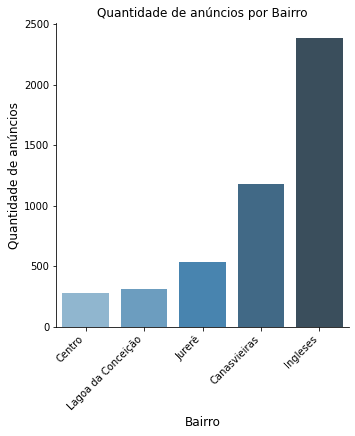

In [399]:
g = sns.catplot(x="suburb", kind="count", data=df_details,
                ci=None, legend_out=False, palette="Blues_d",
                order = df_details['suburb'].value_counts(ascending=True).index)

g.set_xticklabels(rotation=45, horizontalalignment='right')
g.set_axis_labels('Bairro', 'Quantidade de anúncios', fontsize=12)
plt.title('Quantidade de anúncios por Bairro')

# 2) Ordene os bairros em ordem crescente de faturamento médio dos listings

Considerar a seguinte definição para faturamento (consta nas instruções do desafio): "`O faturamento de um anúncio é a soma do preço das datas alugadas.`"

## Não pode haver duas linhas com *airbnb_listing_id*, *booked_on* e *date* iguais.
Remover linhas duplicadas (caso exista).

In [400]:
df_price.drop_duplicates(subset=['airbnb_listing_id', 'booked_on', 'date'], inplace= True)
df_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284086 entries, 0 to 289918
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   airbnb_listing_id  284086 non-null  int64  
 1   booked_on          284086 non-null  object 
 2   date               284086 non-null  object 
 3   price_string       284086 non-null  float64
 4   occupied           284086 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 13.0+ MB


## Criar um DataFrame com os anúncios onde houve locação

Para haver faturamento, tem que haver reserva para a locação, pois conforme a definição: "`O faturamento de um anúncio é a soma do preços das datas alugadas`."

Obs.: Se a coluna *booked_on* for igual a "blank", significa que não houve reserva naquela Data (sem locação). Se houver alguma Data definida em *booked_on*, então nessa Data houve uma reserva para alguma Data da coluna *date*.

Então, temos que garantir que não há "blank" em *booked_on*, uma vez que queremos apenas datas onde houve locação.

In [401]:
df_alugado = df_price.query("booked_on != 'blank'")
df_alugado = df_alugado[['airbnb_listing_id', 'price_string']]
df_alugado

,airbnb_listing_id,price_string
12,40206270,380.0
13,40206270,380.0
52,40206270,195.0
53,40206270,350.0
54,40206270,350.0
...,...,...
289907,40199361,250.0
289913,40199361,250.0
289916,40199361,250.0
289917,40199361,250.0


## Criar um DataFrame com os IDs dos anúncios e os bairros correspondentes


In [402]:
df_id_bairro = df_details[['airbnb_listing_id', 'suburb']]
df_id_bairro

,airbnb_listing_id,suburb
0,31389869,Jurerê
1,40010667,Canasvieiras
2,38905997,Ingleses
3,22343656,Ingleses
4,18328184,Canasvieiras
...,...,...
4686,34392248,Ingleses
4687,44538969,Canasvieiras
4688,16609826,Jurerê
4689,31239515,Canasvieiras


## Criar um novo DataFrame que mescla IDs (apenas onde há datas alugadas), os preços e os respectivos Bairros


In [403]:
df_merge = df_alugado.merge(df_id_bairro, on = "airbnb_listing_id")

# verificar se o nº de linhas de df_merge é igual ao df_alugado. Precisam ser iguais depois do merge
if df_merge.shape[0] == df_alugado.shape[0]:
  print('Ok!')

df_merge

Ok!


,airbnb_listing_id,price_string,suburb
0,40206270,380.0,Ingleses
1,40206270,380.0,Ingleses
2,40206270,195.0,Ingleses
3,40206270,350.0,Ingleses
4,40206270,350.0,Ingleses
...,...,...,...
132018,40199361,250.0,Canasvieiras
132019,40199361,250.0,Canasvieiras
132020,40199361,250.0,Canasvieiras
132021,40199361,250.0,Canasvieiras


## Criar um DataFrame correspondente ao **faturamento médio por bairro** em ordem crescente


In [404]:
df_faturamento_medio_por_bairro = df_merge.groupby("suburb").mean()
df_faturamento_medio_por_bairro.sort_values('price_string', ascending=True, inplace=True)

# Renomear o price_string, já que agora é médio
df_faturamento_medio_por_bairro.columns = ['airbnb_listing_id', 'Faturamento médio']
df_faturamento_medio_por_bairro.index.names = ['Bairro']
df_faturamento_medio_por_bairro['Faturamento médio'].to_frame().round(2)

,Faturamento médio
Bairro,
Centro,218.73
Lagoa da Conceição,239.89
Canasvieiras,294.16
Ingleses,358.26
Jurerê,409.61


## Plotar gráfico correspondente ao **faturamento médio por bairro** em ordem crescente


Text(0.5, 1.0, 'Faturamento médio por Bairro')

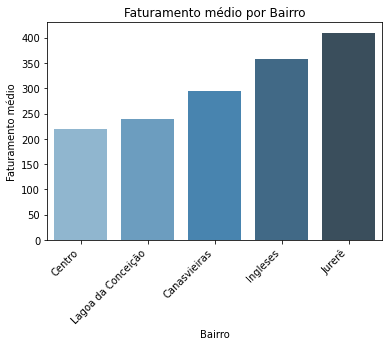

In [405]:
g = sns.barplot(x='Bairro', y='Faturamento médio',
                data=df_faturamento_medio_por_bairro.reset_index(),
                palette="Blues_d")

g.set_xticklabels(df_faturamento_medio_por_bairro.reset_index()['Bairro'],
                  rotation=45,
                  horizontalalignment='right')

plt.title('Faturamento médio por Bairro')

# 3) Existem correlações entre as características de um anúncio e seu faturamento?

## Encontrar o faturamento total para cada anúncio *individualmente*

In [406]:
# Agrupar pelo ID e somar
df_faturamento_total_por_anuncio = df_merge.groupby("airbnb_listing_id").sum()
df_faturamento_total_por_anuncio = df_faturamento_total_por_anuncio[['price_string']].reset_index()
df_faturamento_total_por_anuncio.columns = ['airbnb_listing_id', 'faturamento']

## Mesclar *df_faturamento_total_por_anuncio* versus características do anúncio (*df_details*)


In [407]:
df_merge = df_faturamento_total_por_anuncio.merge(df_details, on = "airbnb_listing_id")

## Criar coluna com dicotômicas para cada bairro (para analisar a correlação para cada um)

In [408]:
# Criar uma lista com os bairros existentes
bairros = df_merge['suburb'].unique()

# Para cada bairro será criada uma coluna com 1 ou 0, em que 1 representa sim e 0 representa não. 
for i in bairros:
  selecao = df_merge['suburb'].isin([i])
  selecao = selecao.astype(int)
  df_merge[i] = selecao

# A coluna de bairros "suburb" pode ser removida do DataFrame.
df_merge.drop('suburb', axis=1, inplace=True)

## Criar uma lista de palavras-chave (*keywords*) que podem constar na coluna de anúncio *ad_name*. A ideia é verificar se o que está sendo anunciado por escrito está correlacionado com o faturamento.


In [409]:
# Se alguma dessas palavras constar no campo "ad_name", será criada uma variável "1". Caso contrário "0" indicando não.
lista_keywords = ['cobertura', 'piscina', 'duplex', 'triplex',
                  'decorado', 'privativ', 'ampl', 'panorâmic',
                  'alto padr', 'luxo', 'nobre', 'churrasqueira',
                  'segurança', 'amplo']

pattern = '|'.join(lista_keywords)
df_merge['keywords'] = df_merge['ad_name'].str.contains(pattern, case=False)

# Trocar true/false to 1/0 em keywords
df_merge['keywords'] = df_merge['keywords'].astype(int)

## Preparar a coluna *is_superhost* e fazer uma seleção para que não sejam consideradas colunas com valores NaN para o cálculo da correlação de Pearson.

In [410]:
# Trocar true/false por 1/0 em is_superhost
df_merge['is_superhost'] = df_merge['is_superhost'].astype(int)

#selecao para retirar rows com NaN
selecao = ( df_merge['number_of_bedrooms'].notna() ) & ( df_merge['number_of_bathrooms'].notna() ) & ( df_merge['star_rating'].notna() ) & ( df_merge['number_of_reviews'].notna())

df_merge = df_merge[selecao]

## Calcular as correlações de Pearson

In [411]:
# Remover a coluna dos identificadores ID. Nesse momento não são mais necessários
df_merge.drop('airbnb_listing_id', axis=1, inplace=True)

# Fazer as correlações de Pearson
correlacao = df_merge.corr()
correlacao = correlacao.head(1)
correlacao.drop('faturamento', axis=1, inplace=True)

# Renomear colunas para melhorar apresentação
correlacao.columns = ['Nº de quartos', 'Nº de banheiros', 'Classificacão', 'Superhost',
                      'Nº reviews', 'Canasvieiras', 'Ingleses', 'Lagoa da Conceição',
                      'Jurerê', 'Centro', 'Keywords']


## **Correlações entre as características de um anúncio e seu faturamento**

In [412]:
# Usar um gradiente de cores em "Azul" para indicar quais correlações são mais fortes. Quanto maior é o valor, mais intensa é a cor.
# A visualização deve ser feita no Colab ou Jupyter
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))

correlacao.style.background_gradient(cmap='Blues', axis=1).set_precision(2)

,Nº de quartos,Nº de banheiros,Classificacão,Superhost,Nº reviews,Canasvieiras,Ingleses,Lagoa da Conceição,Jurerê,Centro,Keywords
faturamento,0.21,0.23,0.09,0.09,0.09,-0.07,0.04,-0.08,0.17,-0.11,0.17


# 4) Qual a antecedência média das reservas? Esse número é maior ou menor para finais de semana?

Antecedência é a diferença entre a data de reserva (*booked_on*) e a data alugada (*date*)

## Criar coluna "*antecedencia*" nos imóveis alugados


In [413]:
pd.options.mode.chained_assignment = None
df_alugado = df_price.query("booked_on != 'blank'")
df_alugado['date'] = pd.to_datetime(df_alugado['date'])
df_alugado['booked_on'] = pd.to_datetime(df_alugado['booked_on'])
df_alugado['antecedencia'] = df_alugado['date'] - df_alugado['booked_on']
df_alugado.head(10)

,airbnb_listing_id,booked_on,date,price_string,occupied,antecedencia
12,40206270,2021-01-01,2021-01-01,380.0,1,0 days
13,40206270,2021-01-01,2021-01-02,380.0,1,1 days
52,40206270,2021-02-10,2021-02-10,195.0,1,0 days
53,40206270,2021-02-10,2021-02-11,350.0,1,1 days
54,40206270,2021-02-10,2021-02-12,350.0,1,2 days
56,40206270,2021-02-10,2021-02-13,350.0,1,3 days
58,40206270,2021-02-10,2021-02-14,350.0,1,4 days
60,40206270,2021-02-10,2021-02-15,350.0,1,5 days
61,40206270,2021-02-10,2021-02-16,350.0,1,6 days
62,40206270,2021-02-10,2021-02-17,195.0,1,7 days


## Criar uma função que retorna o número de dias e horas de antecedência

In [414]:
def retorna_antecendia(df):
  dias = df.days
  horas = df.seconds/3600
  print(f'A antecedência média das reservas é de {dias} dias e {horas} horas')

## **Antecedência média das reservas (geral)**

In [415]:
# Calcular a média da antecedência média das reservas (de modo geral).

df_antecedencia_media = df_alugado['antecedencia'].mean()
retorna_antecendia(df_antecedencia_media)

A antecedência média das reservas é de 32 dias e 8.465 horas


## **Antecedência média das reservas (para fins de semana)**

Considerando apenas reservas feitas para fins de semana


In [416]:
# Reservar para o final de semana (date)
df_alugado["reservar_para_fim_de_semana"] = df_alugado['date'].dt.dayofweek > 4

# Antecedência média - Reservar para o final de semana (date)
df_antecedencia_media_fds = df_alugado.query("reservar_para_fim_de_semana == True")['antecedencia'].mean()
retorna_antecendia(df_antecedencia_media_fds)

A antecedência média das reservas é de 32 dias e 10.646666666666667 horas


A antecedência média **geral** das reservas é de 32 dias e 8,465 horas

Quando essa reserva é **feita exclusivamente para os fins de semana**, a antecedência média é de 32 dias e 10,6467 horas.

Portanto a antecedência média **geral** é menor (por pouco) que a antecedência média de reservas **feitas exclusivamente para os fins de semana**.

